# App user segmentation is the task of grouping users based on how they engage with the app. It helps find retained users, find the user segment for a marketing campaign, and solve many other business problems where you need to search for users based on similar characteristics.

In [1]:
import numpy as np 
import pandas as pd 

In [4]:
df = pd.read_csv("userbehaviour.csv")

In [5]:
df.head() 

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [6]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import pandas as pd
pio.templates.default = "plotly_white"

# Let’s start by looking at the highest, lowest, and average screen time of all the users:

In [7]:
print(f'Average Screen Time = {df["Average Screen Time"].mean()}')
print(f'Highest Screen Time = {df["Average Screen Time"].max()}')
print(f'Lowest Screen Time = {df["Average Screen Time"].min()}')

Average Screen Time = 24.39039039039039
Highest Screen Time = 50.0
Lowest Screen Time = 0.0


# Now let’s have a look at the highest, lowest, and the average amount spent by all the users:

In [8]:
print(f'Average Spend of the Users = {df["Average Spent on App (INR)"].mean()}')
print(f'Highest Spend of the Users = {df["Average Spent on App (INR)"].max()}')
print(f'Lowest Spend of the Users = {df["Average Spent on App (INR)"].min()}') 

Average Spend of the Users = 424.4154154154154
Highest Spend of the Users = 998.0
Lowest Spend of the Users = 0.0


# Now let’s have a look at the relationship between the spending capacity and screen time of the active users and the users who have uninstalled the app:

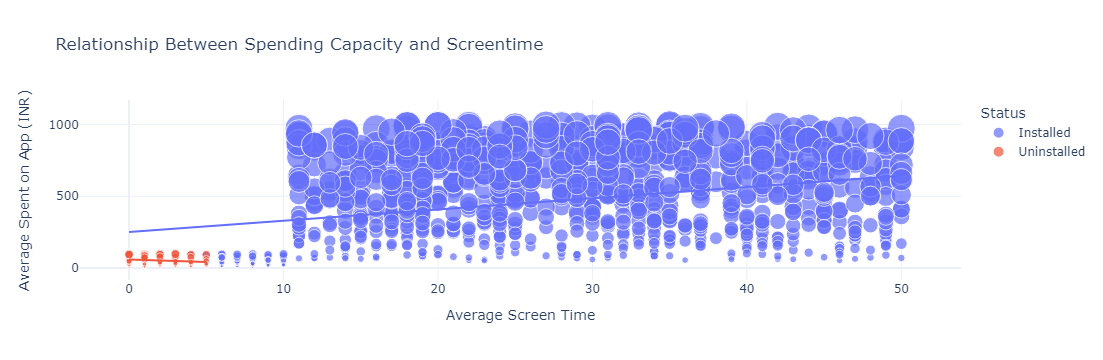

In [19]:
figure = px.scatter(data_frame = df, 
                    x="Average Screen Time",
                    y="Average Spent on App (INR)", 
                    size="Average Spent on App (INR)", 
                    color= "Status",
                    title = "Relationship Between Spending Capacity and Screentime",
                    trendline="ols"
                   )
figure.show()

# So this is great! Users who uninstalled the app had an average screen time of fewer than 5 minutes a day, and the average spent was less than 100. We can also see a linear relationship between the average screen time and the average spending of the users still using the app.

# Now let’s have a look at the relationship between the ratings given by users and the average screen time:

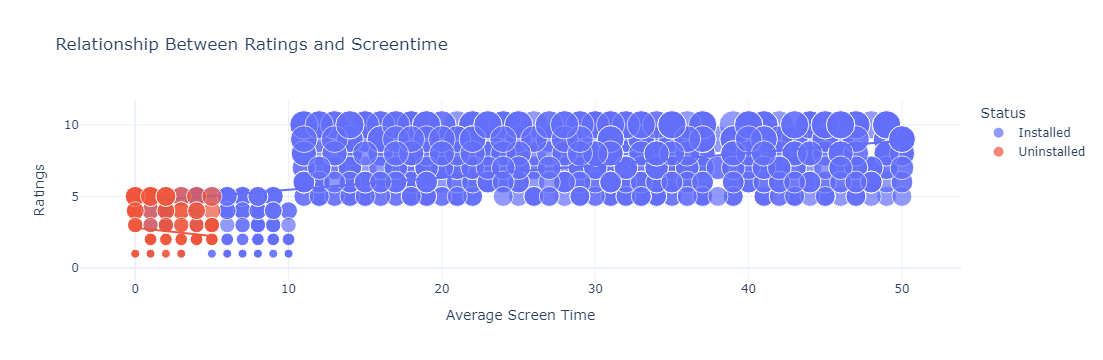

In [8]:
figure = px.scatter(data_frame = df, 
                    x="Average Screen Time",
                    y="Ratings", 
                    size="Ratings", 
                    color= "Status", 
                    title = "Relationship Between Ratings and Screentime",
                    trendline="ols")
figure.show()

# So we can see that users who uninstalled the app gave the app a maximum of five ratings. Their screen time is very low compared to users who rated more. So, this describes that users who don’t like to spend more time rate the app low and uninstall it at some point.

# App User Segmentation to Find Retained and Lost Users

In [20]:
clustering_data = df[["Average Screen Time", "Left Review", 
                        "Ratings", "Last Visited Minutes", 
                        "Average Spent on App (INR)", 
                        "New Password Request"]]

In [21]:
from sklearn.preprocessing import MinMaxScaler
for i in clustering_data.columns:
    MinMaxScaler(i)
    
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(clustering_data)
df["Segments"] = clusters

print(df.head(10))

   userid  Average Screen Time  Average Spent on App (INR)  Left Review  \
0    1001                 17.0                       634.0            1   
1    1002                  0.0                        54.0            0   
2    1003                 37.0                       207.0            0   
3    1004                 32.0                       445.0            1   
4    1005                 45.0                       427.0            1   
5    1006                 28.0                       599.0            0   
6    1007                 49.0                       887.0            1   
7    1008                  8.0                        31.0            0   
8    1009                 28.0                       741.0            1   
9    1010                 28.0                       524.0            1   

   Ratings  New Password Request  Last Visited Minutes       Status  Segments  
0        9                     7                  2990    Installed         0  
1        4    

In [27]:
print(df["Segments"].value_counts())

Series([], Name: count, dtype: int64)


# Now let’s rename the segments for a better understanding:

In [28]:
df["Segments"] = df["Segments"].map({0: "Retained", 1: 
    "Churn", 2: "Needs Attention"})

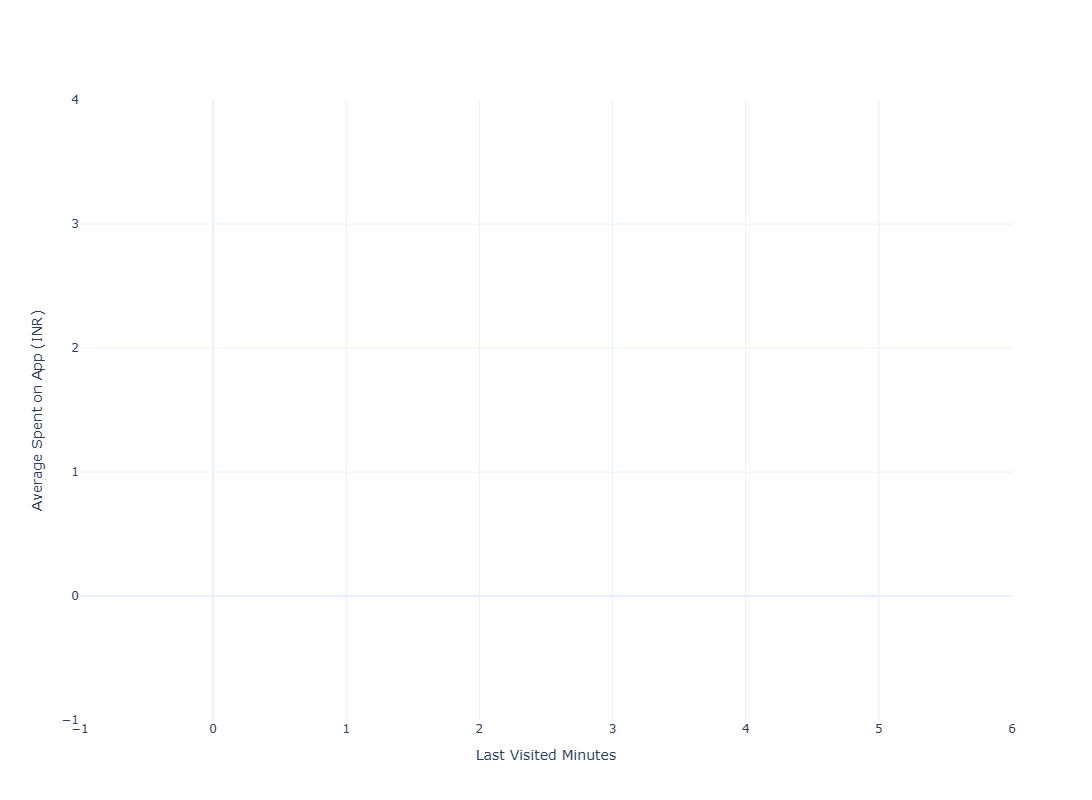

In [29]:
PLOT = go.Figure()
for i in list(df["Segments"].unique()):
    

    PLOT.add_trace(go.Scatter(x = df[df["Segments"]== i]['Last Visited Minutes'],
                                y = df[df["Segments"] == i]['Average Spent on App (INR)'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Last Visited Minutes: %{x} <br>Average Spent on App (INR): %{y}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   yaxis_title = 'Average Spent on App (INR)',
                   xaxis_title = 'Last Visited Minutes',
                   scene = dict(xaxis=dict(title = 'Last Visited Minutes', titlefont_color = 'black'),
                                yaxis=dict(title = 'Average Spent on App (INR)', 
                                           titlefont_color = 'black')))

# The blue segment shows the segment of users the app has retained over time. The red segment indicates the segment of users who just uninstalled the app or are about to uninstall it soon. And the green segment indicates the segment of users that the application has lost.